# Rap Lyrics Analysis: Ice Cube Discography

This notebook demonstrates text analysis on Ice Cube's albums using Python.  
We will load, clean, analyze, and visualize the lyrics.

## Environment Setup

Run this cell to prepare Google Colab or local execution.

In [116]:
import os
import sys

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")

    # Clone repository if in Colab
    if not os.path.exists('/content/rap_lyrics_analysis/'):
        !git clone https://github.com/migue456456/rap_lyrics_analysis.git

    # Change to project directory
    os.chdir('/content/rap_lyrics_analysis')

except ImportError:
    IN_COLAB = False
    print("Running locally")

# Add src directory to Python path
if 'src' not in sys.path:
    sys.path.append('src')

print(f"Current working directory: {os.getcwd()}")

Running in Google Colab
Current working directory: /content/rap_lyrics_analysis


## Import Libraries and Classes

In [117]:
# Standard libraries
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from collections import Counter

# Custom classes
from cleaning import TextCleaner
from loader import CorpusLoader
from analysis import Analysis
from plots import TextPlots
from categories import categories

In [118]:
cleaner = TextCleaner()
loader = CorpusLoader()
album_files = [album for album, _ in albums_by_year]
loader.load_albums(album_files)
cleaned_corpus = {album: cleaner.clean_text(text) for album, text in loader.corpus.items()}

Loaded AmeriKKKas Most Wanted - Ice Cube.txt (43925 characters)
Loaded Kill at Will - Ice Cube (1).txt (17608 characters)
Loaded Death Certificate - Ice Cube.txt (58520 characters)
Loaded The Predator - Ice Cube.txt (48132 characters)
Loaded Everythang's Corrupt - Ice Cube.txt (54977 characters)
Loaded Man vs Machine - Ice Cube.txt (6197 characters)
Loaded Man Down - Ice Cube.txt (48295 characters)
Loaded Man up - Ice Cube.txt (34500 characters)


# Prepared Albums in Order

In [119]:
# Album list in chronological order (year matters for analysis)
albums_by_year = [
    ("AmeriKKKas Most Wanted - Ice Cube.txt", 1990),
    ("Kill at Will - Ice Cube (1).txt", 1990),
    ("Death Certificate - Ice Cube.txt", 1991),
    ("The Predator - Ice Cube.txt", 1992),
    ("Everythang's Corrupt - Ice Cube.txt", 2018),
    ("Man vs Machine - Ice Cube.txt", 2021),
    ("Man Down - Ice Cube.txt", 2024),
    ("Man up - Ice Cube.txt", 2025),
]

# Category Totals for all Albums

In [120]:
# List to store per-album results
rows = []

for album, year in albums_by_year:
    # Tokenize cleaned text for this album
    tokens = cleaner.tokenize(cleaned_corpus[album])

    # Count words
    word_counts = cleaner.count_words(tokens)

    # Remove stop words like "the", "and", etc.
    word_counts = cleaner.remove_stopwords(word_counts)

    # Run analysis
    analysis = Analysis(word_counts)
    category_totals = analysis.category_totals()

    # Store results in a row (dictionary)
    row = {
        "album": album,
        "year": year,
        **category_totals
    }

    rows.append(row)

## Plot top-k words for individual albums

In [121]:
top_k = 10  # Number of top words to display

# Create an instance of the plotting class
plots = TextPlots()

for album, year in albums_by_year:
    # Tokenize and count words for this album
    tokens = cleaner.tokenize(cleaned_corpus[album])
    word_counts = cleaner.count_words(tokens)
    word_counts = cleaner.remove_stopwords(word_counts)

    # Run analysis
    analysis = Analysis(word_counts)
    sorted_words = analysis.sort_counts()

    # Plot top-k words
    plots.plot_top_k(sorted_words, k=top_k, title=album)


# Data Frame for Categories

In [122]:
# Create DataFrame from all albums
df_categories = pd.DataFrame(rows)

# Sort by year to guarantee correct order
df_categories = df_categories.sort_values("year")

df_categories

,album,year,beat,weapon,lawenforcer,fox,murder,color
0,AmeriKKKas Most Wanted - Ice Cube.txt,1990,15,19,10,6,12,19
1,Kill at Will - Ice Cube (1).txt,1990,6,11,4,2,6,9
2,Death Certificate - Ice Cube.txt,1991,5,38,9,5,18,38
3,The Predator - Ice Cube.txt,1992,5,27,11,12,7,28
4,Everythang's Corrupt - Ice Cube.txt,2018,10,4,50,6,28,24
5,Man vs Machine - Ice Cube.txt,2021,0,10,0,1,2,0
6,Man Down - Ice Cube.txt,2024,5,8,2,22,7,3
7,Man up - Ice Cube.txt,2025,8,7,2,10,8,15


# Category Trend Over Time

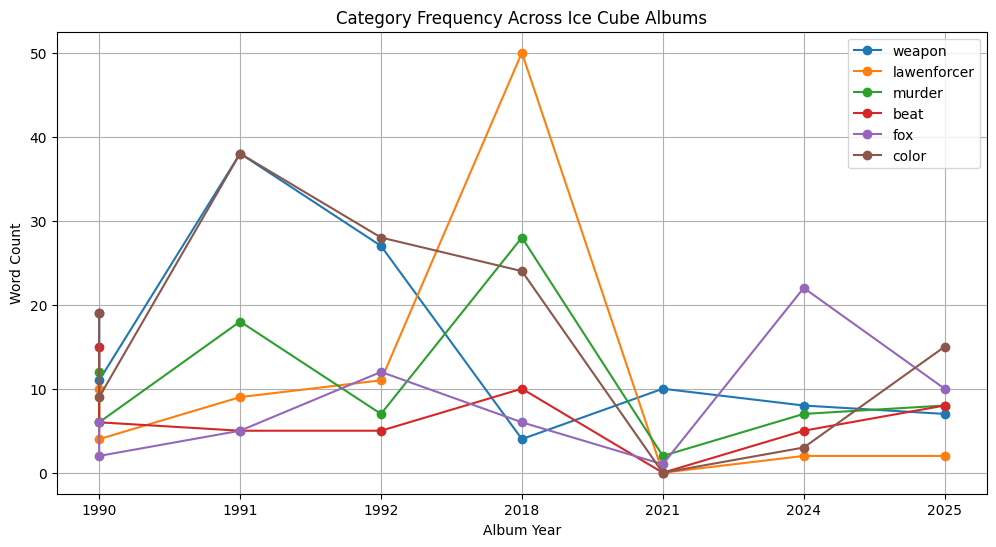

In [123]:
# Set album names as x-axis labels
x_labels = df_categories["year"].astype(str)

plt.figure(figsize=(12, 6))

# Plot each category across albums
for category in ["weapon", "lawenforcer", "murder", "beat", "fox", "color"]:
    plt.plot(x_labels, df_categories[category], marker='o', label=category)

plt.title("Category Frequency Across Ice Cube Albums")
plt.xlabel("Album Year")
plt.ylabel("Word Count")
plt.legend()
plt.grid(True)
plt.show()

# Bar Chart: Total Category Used by Album

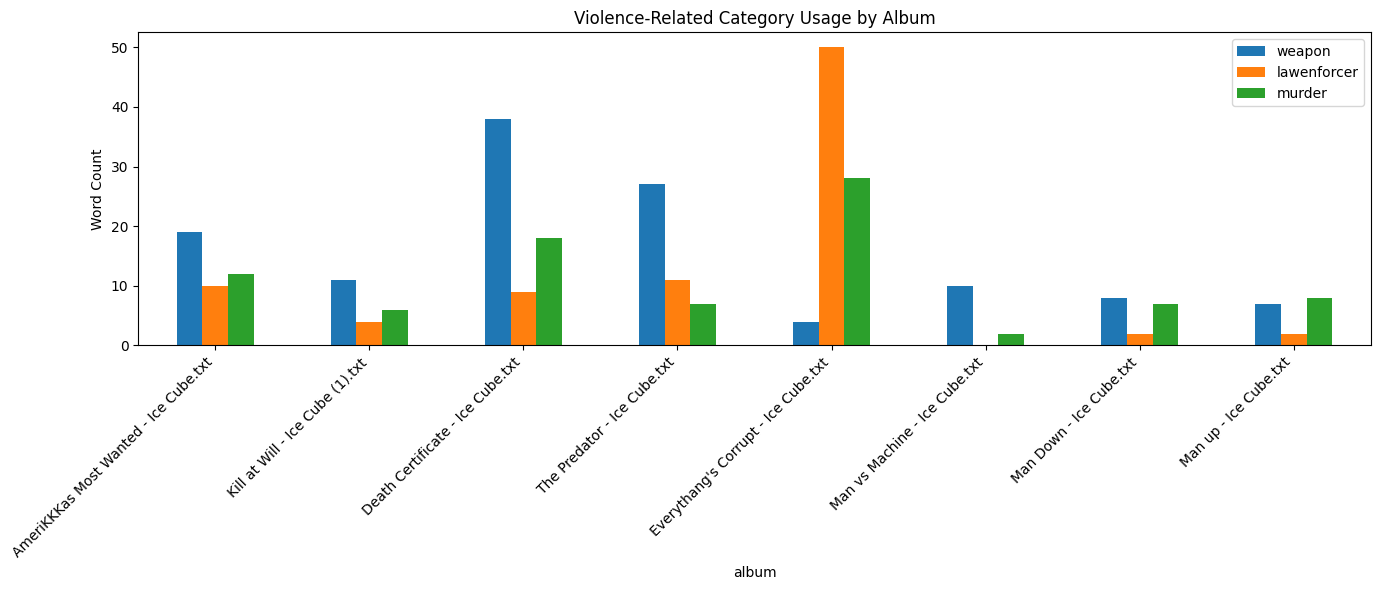

In [124]:
df_categories.set_index("album")[
    ["weapon", "lawenforcer", "murder"]
].plot(
    kind="bar",
    figsize=(14, 6)
)

plt.title("Violence-Related Category Usage by Album")
plt.ylabel("Word Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Conclusion

This analysis demonstrates:

- Text loading and preprocessing of multiple album lyric files

- Tokenization, stopword removal, and word-frequency analysis

- Use of pandas DataFrames to compare albums across release years

- Visualization of word usage and category trends across albums

- Comparative analysis showing how lyrical themes evolve over time

- Modular code organization using loader, cleaner, analysis, and plotting classes